<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/ML_T1_sencillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

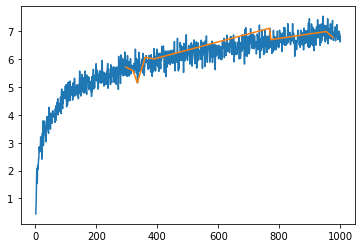

In [125]:
#Resolvamos el problema original.
import numpy as np
import matplotlib.pyplot as plt
def GD_N(theta,alpha,eta,nIter, grad,stop_crit=10**(-4)):
    p     = np.zeros(theta.shape)
    Theta=[theta]
    for t in range(nIter):
        pre_theta = theta - 2.0*alpha*p
        g = grad(pre_theta)
        p = 0.5*(g + eta*p)
        if(np.linalg.norm(g)<stop_crit):
            if(t==0):
                print("No hizo nada\n")
            break
        theta = theta - alpha*p
        Theta.append(theta)
    print("Iteraciones: ",t)
    return Theta[-1]
np.random.seed(0)
n=1000
x=np.linspace(1,n,n)
y=np.log(x)+np.random.normal(0,.25,size=len(x))
from numpy.random import default_rng
m=10
x_m=np.sort(default_rng().choice(np.arange(0, len(x)), size=m, replace=False))
y_m=y[x_m]
plt.plot(x,y)
plt.plot(x_m,y_m)

In [90]:
def matriz_phi_sigma(sigma):
    M=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            M[i,j] = np.exp(-((x[i] -x_m[j])**2)/(2*(sigma[j])**2))#*((x_m[i] -x_m[j])**2)/(2*sigma[i]**3)
    return M

In [91]:
def solve_for_alphas(M):
    return np.dot(np.dot(np.linalg.inv(np.dot(M.T,M)),M.T),y)
solve_for_alphas(matriz_phi_sigma(np.repeat(1,m)))

#Asi ya puedo resolver para alpha, dado sigma.

array([5.73702565, 5.71652981, 7.47776355, 7.6548733 , 8.94835418,
       8.88695954, 8.94735395, 9.23413662, 9.88935346, 9.93865131])

In [94]:
def phi(s,x,x_j):
    return np.exp(-(1/2*s**2)*(x-x_j)**2)
def J_sigma_phi(sigma,alpha):
    J=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            J[i][j]=alpha[j]*(phi(s=sigma[j],x=x[i],x_j=x_m[j]))*((x[i]-x_m[j])**2/sigma[j]**3)
    return J
#J_sigma_phi(sigma=np.repeat(1,100),alpha=np.repeat(1,100))


In [118]:
def F_ajuste(sigma,alpha,x):
    sum=0
    for j in range(m):
        sum+=alpha[j]*np.exp(-(1/(2*sigma**2))*(x-x_m[j])**2)
    return sum

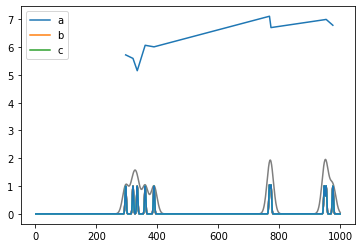

Iteraciones:  49


KeyboardInterrupt: ignored

In [143]:
sigma_0=np.array([2,2,2,2,2,2,10,2,2,2])
alpha_0=np.repeat(1,m)
def F_ajuste_a_s(W):
    R=[]
    for w in W:
        R.append(F_ajuste(sigma=sigma_0,alpha=alpha_0,x=w))
    return np.array(R)
plt.plot(x_m,y_m)
plt.plot(x,F_ajuste_a_s(x))
plt.legend(['a','b','c'])
plt.show()
iter=1
alpha_0=solve_for_alphas(matriz_phi_sigma(sigma_0))
def grad_alpha(sigma):
    return np.dot(-J_sigma_phi(sigma=sigma,alpha=alpha_0).T,(y-np.dot(matriz_phi_sigma(sigma=sigma),alpha_0)))
sigma_0=GD_N(theta=sigma_0,alpha=0.00001,eta=0.9,nIter=50, grad=grad_alpha,stop_crit=10**(-16))
alpha_0=solve_for_alphas(matriz_phi_sigma(sigma_0))
def grad_alpha(sigma):
    return np.dot(-J_sigma_phi(sigma=sigma,alpha=alpha_0).T,(y-np.dot(matriz_phi_sigma(sigma=sigma),alpha_0)))
sigma_0=GD_N(theta=sigma_0,alpha=0.00001,eta=0.9,nIter=50, grad=grad_alpha,stop_crit=10**(-16))
plt.plot(x_m,y_m)
plt.plot(x,F_ajuste_a_s(x))
plt.show()


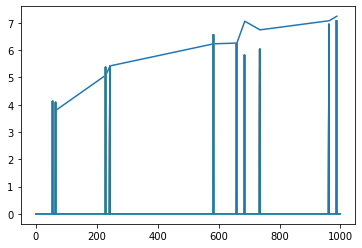

In [106]:
plt.plot(x_m,y_m)

plt.plot(F_ajuste_a_s(x))